# Real Estate Price Predictor

In [1]:
import pandas as pd

In [2]:
housing= pd.read_excel("data.xlsx")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.288275,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703812,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000169EE825A60>,
      dtype=object)

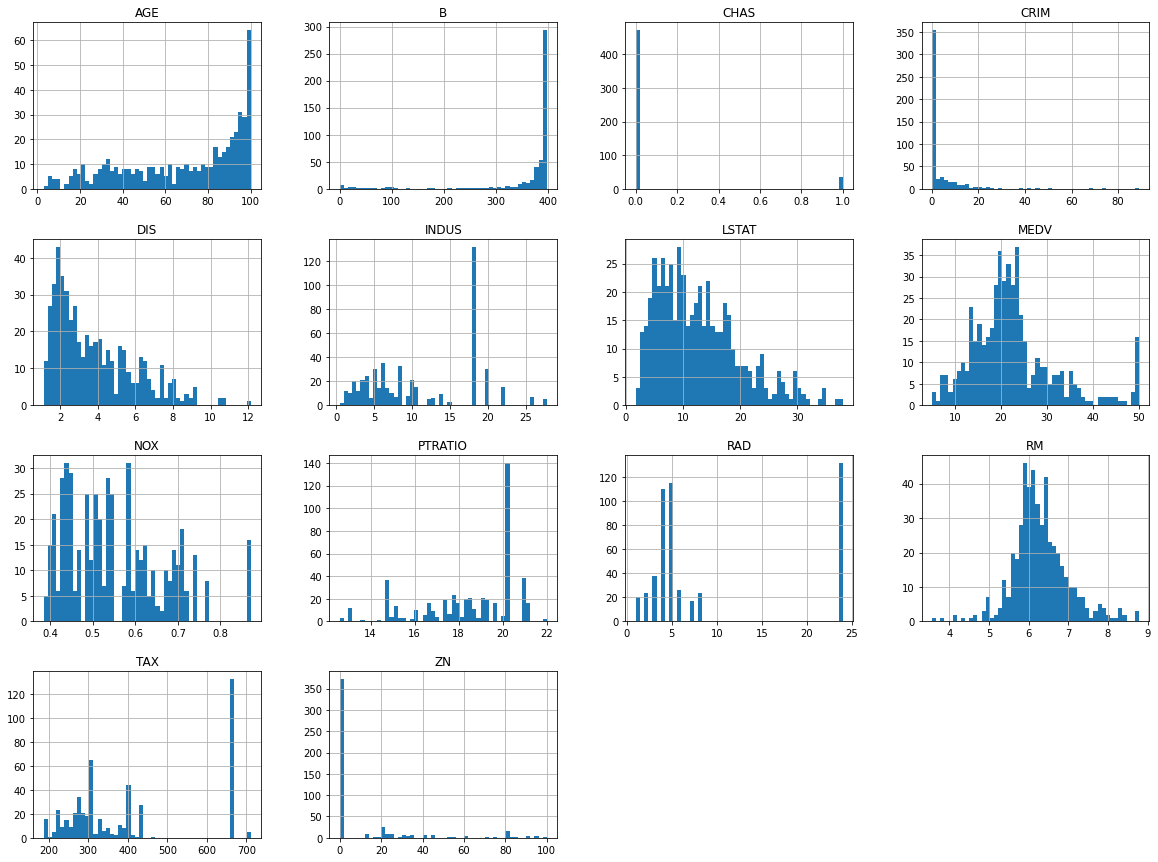

In [9]:
housing.hist(bins=50, figsize=(20,15))

## Train-Test split (Stratified sampling)

In [10]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set= housing.loc[train_index]
    strat_test_set= housing.loc[test_index]

In [12]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [13]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [14]:
housing=strat_train_set.copy()

## Looking for correlations

In [15]:
corr_matrix= housing.corr()

In [16]:
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.212927,0.416640,-0.061482,0.430879,-0.261405,0.361890,-0.386900,0.648221,0.603934,0.305603,-0.486869,0.471442,-0.393715
ZN,-0.212927,1.000000,-0.542161,-0.023536,-0.509327,0.292589,-0.565680,0.666939,-0.306480,-0.322803,-0.390570,0.188575,-0.420097,0.339741
INDUS,0.416640,-0.542161,1.000000,0.043686,0.759051,-0.378876,0.644114,-0.708612,0.580908,0.716288,0.384465,-0.368685,0.611068,-0.473516
CHAS,-0.061482,-0.023536,0.043686,1.000000,0.077490,0.098788,0.058388,-0.088081,-0.023005,-0.048802,-0.132682,0.048275,-0.077592,0.205066
NOX,0.430879,-0.509327,0.759051,0.077490,1.000000,-0.301015,0.727358,-0.763623,0.596012,0.659049,0.164977,-0.408434,0.602386,-0.422873
RM,-0.261405,0.292589,-0.378876,0.098788,-0.301015,1.000000,-0.237932,0.204821,-0.204261,-0.278735,-0.329697,0.122584,-0.598676,0.677626
AGE,0.361890,-0.565680,0.644114,0.058388,0.727358,-0.237932,1.000000,-0.734827,0.449489,0.501491,0.259633,-0.287900,0.599211,-0.364596
DIS,-0.386900,0.666939,-0.708612,-0.088081,-0.763623,0.204821,-0.734827,1.000000,-0.481556,-0.530840,-0.215173,0.309222,-0.501408,0.240451
RAD,0.648221,-0.306480,0.580908,-0.023005,0.596012,-0.204261,0.449489,-0.481556,1.000000,0.910932,0.471912,-0.490951,0.479857,-0.374693
TAX,0.603934,-0.322803,0.716288,-0.048802,0.659049,-0.278735,0.501491,-0.530840,0.910932,1.000000,0.473026,-0.475293,0.534228,-0.456657


In [17]:
corr_matrix['MEDV'].sort_values(ascending= False)

MEDV       1.000000
RM         0.677626
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000169F24DE880>,
      dtype=object)

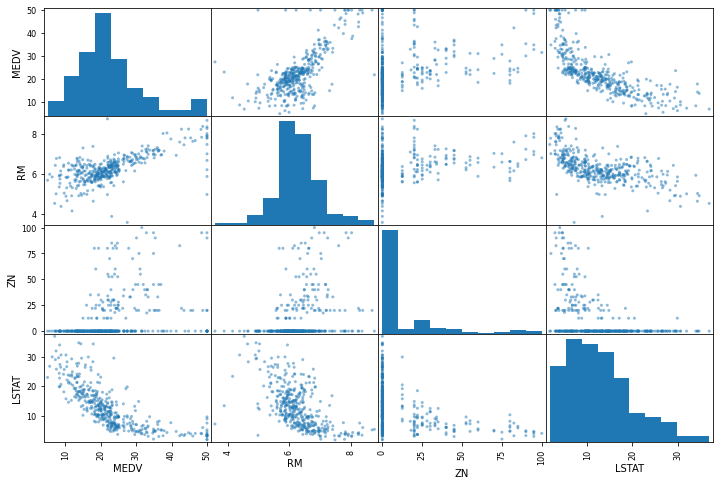

In [18]:
from pandas.plotting import scatter_matrix
attributes=['MEDV','RM','ZN','LSTAT']
scatter_matrix(housing[attributes], figsize= (12,8))

## Trying out attribute combination

In [19]:
housing['TAXRM']= housing['TAX']/housing['RM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [20]:
corr_matrix= housing.corr()

In [21]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.677626
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.523874
LSTAT     -0.740494
Name: MEDV, dtype: float64

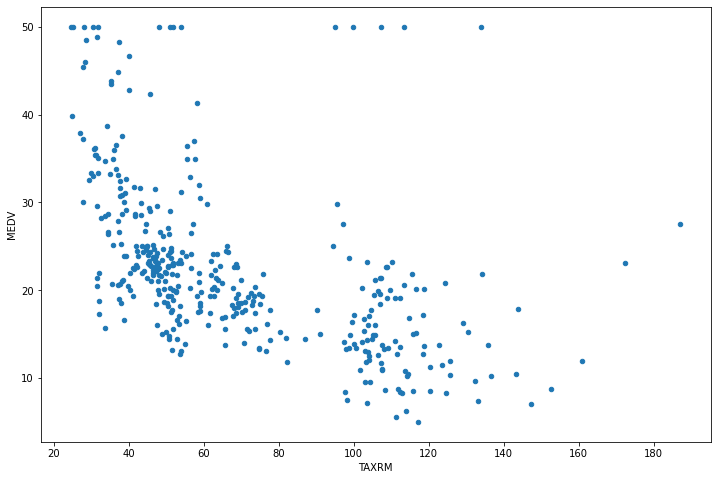

In [22]:
housing.plot(kind='scatter', x='TAXRM', y='MEDV', figsize=(12,8))

In [23]:
housing= strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Creating a Pipeline

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline= Pipeline([('imputer', SimpleImputer(strategy="median")),('std_scaler', StandardScaler())])

In [25]:
housing_num_tr= my_pipeline.fit_transform(housing)

## Selecting a desired model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model= LinearRegression()             Mean:5.030614751466153   Standard Deviation:1.0540564969043007
#model= DecisionTreeRegressor()        Mean:4.345685027668557   Standard Deviation:0.8448785776838241
model= RandomForestRegressor()        #Mean:3.330209847513136  Standard Deviation:0.6772671046933416
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

## Evaluating the model- Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)

In [28]:
rmse_scores

array([2.85069986, 2.77944684, 4.33125369, 2.55894142, 3.27465857,
       2.59171908, 4.73816307, 3.29484133, 3.35212085, 3.24824278])

In [29]:
def print_scores(model_scores):
    print("Scores: ",model_scores)
    print("Mean: ",model_scores.mean())
    print("Standard Deviation: ",model_scores.std())

In [30]:
print_scores(rmse_scores)

Scores:  [2.85069986 2.77944684 4.33125369 2.55894142 3.27465857 2.59171908
 4.73816307 3.29484133 3.35212085 3.24824278]
Mean:  3.3020087493922192
Standard Deviation:  0.6827515606063426


## Saving The Model

In [31]:
from joblib import dump, load
dump(model, "Dragon.joblib")

['Dragon.joblib']

## Testing the model on test data

In [32]:
from sklearn.metrics import mean_squared_error
X_test= strat_test_set.drop("MEDV", axis=1)
Y_test= strat_test_set["MEDV"].copy()
X_test_prepared= my_pipeline.transform(X_test)
final_predictions= model.predict(X_test_prepared)
final_mse= mean_squared_error(Y_test, final_predictions)
final_rmse= np.sqrt(final_mse)

In [33]:
final_rmse

3.010261904767442

## Using The Model

In [34]:
model= load("Dragon.joblib")
features= np.array([[-0.43350488,  1.31822522, -0.71840668, -0.27288841, -0.95145555,
        0.80425342, -0.92972454,  0.24855752, -0.65766683, -0.93991493,
       -0.41063896,  0.45343469, -1.35767382]])
model.predict(features)

array([32.569])